In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# imports our predefined function
import functions
import Style_plot

# import bokeh code specific to outputting graphs in jupyter notebook
from bokeh.io import output_notebook, push_notebook,show

# This comand tells bokeh to output in the notebook
output_notebook()

Loading BokehJS ...

# Detailed plot

This first plot gives a representations of what a golden and a dead cross is. It is also easy to see that while the two crosses that we have pointed out, predicts  the market well. The graph also has multiple crosses of the running means where our prediction does not stick.
Ths is to be expected in technical analysis, especially one as simple as ours. This is an interesting theory, which we wish to visualize, but not a magical rule. 

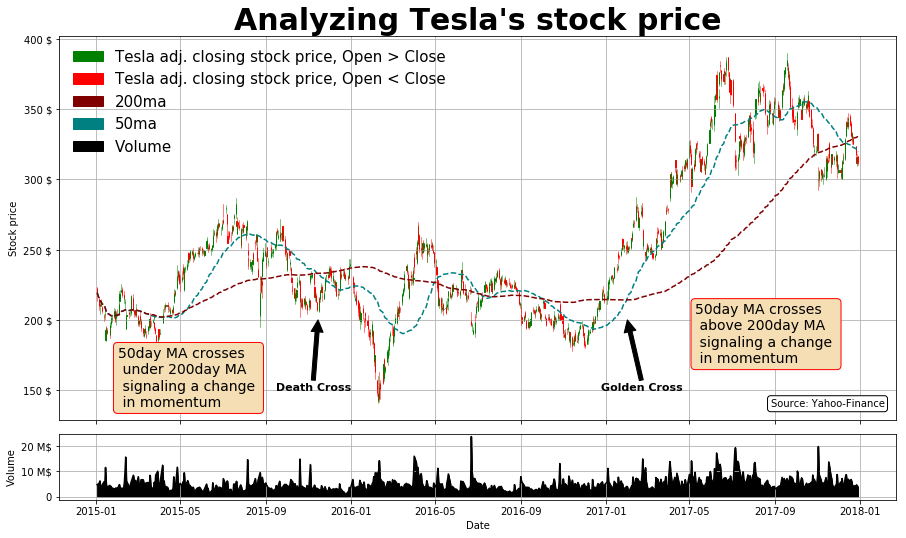

In [3]:
df = Style_plot.figure_1()

So now we want to see how our simple investing theory is doing. 
We are now calculating the return on our strategy. We are using vertical lines, 
to make it easy for the reader to recognize, when there is a cross. 
We are comparing our strategy with the "market", the return of Tesla, if you bought
it at the start date, and just kept it, without making any trade. 

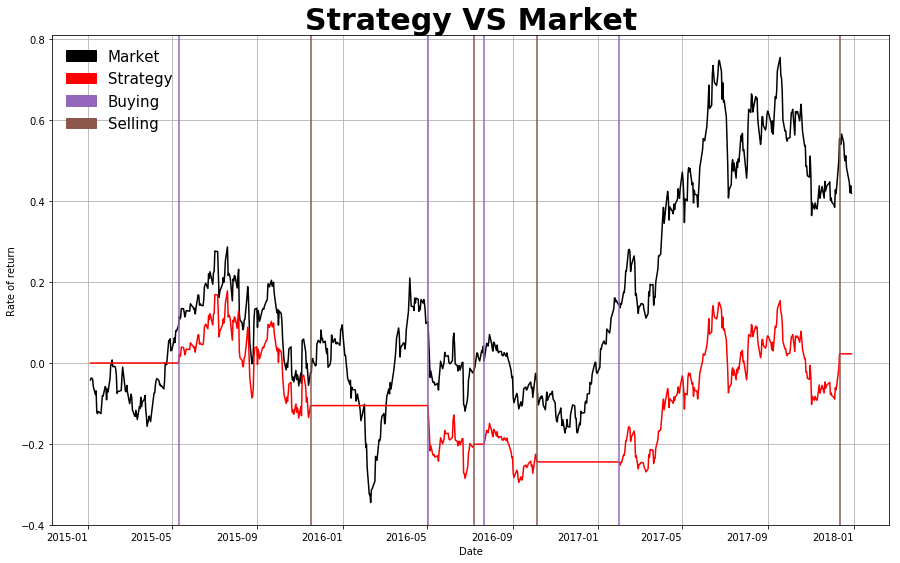

In [4]:
df = Style_plot.figure_2(df)

In this next figure we want to show the different in percent points. 
To follow how our strategy is doing, comparing to the market. We already saw 
in figure 2, that the return of our strategy was underperforming the market. 
Here we want to make it clear, with how much we are underperforming. As you can see,
we are doing really bad. This is probably due to the fact, that we are buying high, 
and often selling low. Keep in mind, that this simple theory have only been tested, 
on one company. Though, we do not think the results will drasticaly change. 
So our conclusion is, that you can't base your investing only on this theory, 
but it can be used as sell and buy signals. 

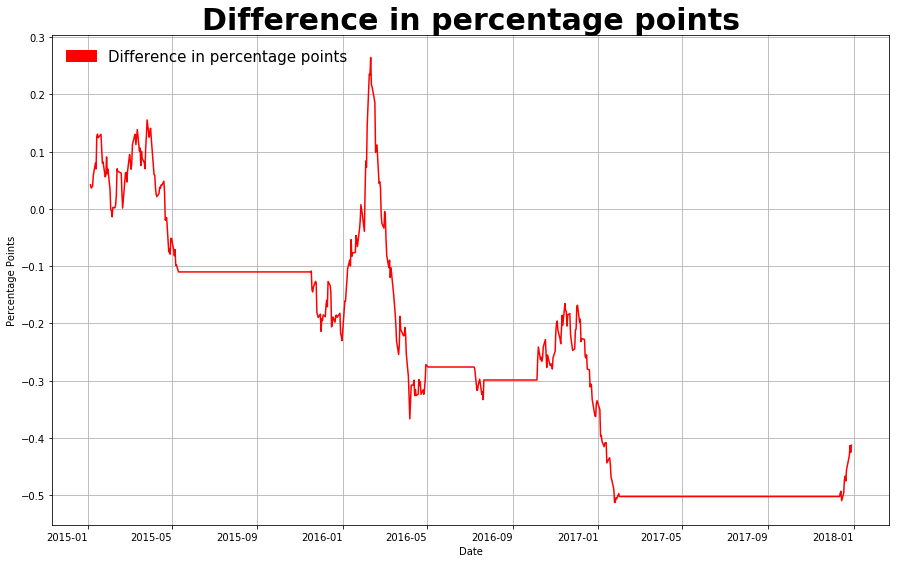

In [5]:
Style_plot.figure_3(df)

We have now looked at how well our strategy would have done on Tesla-stocks. But now we want to go a bit broader, and show how it works for multiple stocks.

# More stocks
**Download data with function for plotting interactively**

In [6]:
# First we choose which companys and indices we want
stock_list = ['TSLA', 'MAERSK-A.CO', 'VWS.CO', 'NOVO-B.CO', 'FB', '^DJI', 'GOOG', 'VELO.CO', '^IXIC', 'INDY', '^N100','^GDAXI']
# For these companys we supply a name dictionairy, this is optional
stock_dict = {'TSLA': 'Tesla', 'MAERSK-A.CO':'Mærsk A','VWS.CO': 'Vestas','NOVO-B.CO':'Novo Nordisk','^IXIC':'NASDAQ Composite',\
             'FB':'Facebook','^DJI':'Dow Jones Industrial Average','GOOG':'Google','VELO.CO':'Veloxis Pharmaceuticals', \
             'INDY': 'Indian top 50 index','^N100':'EURONEXT 100', '^GDAXI':'German DAX index'}

In [20]:
d = functions.download_data(stocks=stock_list,from_year = 2015, to_year=2017,stock_dict=stock_dict)
# The function takes all years and stocks avalible on Yahoo if you know the the symbol
# in addition to downloading the data it also, calculates running means and return on investement if you follow the theory.

This is the head of our initially downloaded dataset for TSLA:
Attributes        High         Low        Open       Close     Volume  \
Date                                                                    
2014-01-02  152.479996  146.550003  149.800003  150.100006  6188400.0   
2014-01-03  152.190002  148.600006  150.000000  149.559998  4695000.0   
2014-01-06  150.399994  145.240005  150.000000  147.000000  5361100.0   
2014-01-07  150.399994  145.250000  147.619995  149.360001  5034100.0   
2014-01-08  153.699997  148.759995  148.850006  151.279999  6163200.0   

Attributes   Adj Close  
Date                    
2014-01-02  150.100006  
2014-01-03  149.559998  
2014-01-06  147.000000  
2014-01-07  149.360001  
2014-01-08  151.279999  

 

Now we have added running means and deleted the earliest observations, that was used to create them:
Attributes        High         Low        Open       Close     Volume  \
Date                                                                    

At last we add the cumulative returns and now have a dataset that looks like this:

In [8]:
d.head()

Stock      Dow Jones Industrial Average                              \
Attributes                    Adj_Close         Close          High   
Date                                                                  
2015-01-02                 17832.990234  17832.990234  17951.779297   
2015-01-05                 17501.650391  17501.650391  17821.300781   
2015-01-06                 17371.640625  17371.640625  17581.050781   
2015-01-07                 17584.519531  17584.519531  17597.080078   
2015-01-08                 17907.869141  17907.869141  17916.039062   

Stock                                                                         \
Attributes           Low          Open Returns_cum Strategy_cum       Volume   
Date                                                                           
2015-01-02  17731.300781  17823.070312         NaN          NaN   76270000.0   
2015-01-05  17475.929688  17821.300781   -1.858016    -1.858016  116160000.0   
2015-01-06  17262.369141  17504.179688   -2.587057    -2.587057  101870000.0   
2015-01-07  17374.779297  17374.779297   -1.393320    -1.393320   91030000.0   
2015-01-08  17591.970703  17591.970703    0.419890     0.419890  114890000.0   

Stock                                      ...          Vestas              \
Attributes        rm_200         rm_50     ...       Adj_Close       Close   
Date                                       ...                               
2015-01-02  16964.566978  17609.041934     ...      222.374451  240.600006   
2015-01-05  16970.730278  17625.516934     ...      219.878967  237.899994   
2015-01-06  16976.267329  17636.841543     ...      230.045700  248.899994   
2015-01-07  16982.574629  17652.173145     ...      218.215332  236.100006   
2015-01-08  16989.825674  17670.215527     ...      219.971405  238.000000   

Stock                                                                    \
Attributes        High         Low        Open Returns_cum Strategy_cum   
Date                                                                      
2015-01-02  242.000000  231.000000  233.000000         NaN          NaN   
2015-01-05  244.899994  236.899994  240.500000   -1.122199          0.0   
2015-01-06  249.899994  232.399994  235.899994    3.449699          0.0   
2015-01-07  248.399994  235.500000  246.000000   -1.870322          0.0   
2015-01-08  241.000000  236.199997  239.800003   -1.080630          0.0   

Stock                                          
Attributes     Volume      rm_200       rm_50  
Date                                           
2015-01-02  2847091.0  222.179886  205.221294  
2015-01-05  2623408.0  222.352721  205.969937  
2015-01-06  3406618.0  222.541730  207.049460  
2015-01-07  4067819.0  222.650791  207.910861  
2015-01-08  2607353.0  222.744140  208.770413  

[5 rows x 120 columns]

For a single company, it looks like this:

In [9]:
d['Tesla'].head()

Attributes,Adj_Close,Close,High,Low,Open,Returns_cum,Strategy_cum,Volume,rm_200,rm_50
Date,,,,,,,,,,
2015-01-02,219.309998,219.309998,223.250000,213.259995,222.869995,NaN,NaN,4764400.0,230.212525,232.2970
2015-01-05,210.089996,210.089996,216.500000,207.160004,214.550003,-4.204095,-4.204095,5368500.0,230.198175,231.7930
2015-01-06,211.279999,211.279999,214.199997,204.210007,210.059998,-3.661483,-3.661483,6261900.0,230.217975,231.3138
2015-01-07,210.949997,210.949997,214.779999,209.779999,213.350006,-3.811956,-3.811956,2968400.0,230.210875,231.0994
2015-01-08,210.619995,210.619995,213.800003,210.009995,212.809998,-3.962429,-3.962429,3442500.0,230.221725,230.4564


**Plotting interactively**

This first plot is simply the adjusted closing price of all the stocks we have chosen. Feel free to view the multiple stocks and also experiment with the interaction options listed below

In [13]:
# This function plots the adjusted closing price all the companys in the symblos_list. 
functions.plot_close(d=d)
## This function has multiple interaction options:
    # If your hover your mouse over the plot it will show you additional information, 
    # about prices, date and also the volume traded a given day
    # The right of the figure has 5 options,
    # 'Pan' you do this by presing and pulling with the mouse on the figure
    # 'Box zoom', you press the option, and then you can zoom in on a chosen area by marking it with the mouse
    # 'Reset' resets all the changes made with the above funtions
    # 'Save' saves a picture of the figure on your computer
    # 'Hover' toggles wether or not the hover option is active

# Different companys is chosen in the bottom,
# For the interaction to be active, it has to be cell that that has most recetnly been run

interactive(children=(Dropdown(description='Choose a stock or index:', layout=Layout(width='50%'), options=('D…

**Including the running means**

The next plot has the running means included, and is thus the last graph of our analysis. You can see, that for some stocks (Facebook, Google, Maersk and Novo) the theory works well over long stretches of time. But also that when the price fluctuates around a fixed point for longer periods, the theory loses all merit. For example Veloxis between 2015 and 2017.

In [14]:
functions.plot_close_mean(d=d)
# In addtion to having all the same features as the figure above,
# this figure also allows you to mute a chosen plot by mouse-clicking its name in the legend

interactive(children=(Dropdown(description='Choose a stock or index:', layout=Layout(width='50%'), options=('D…

**Testing the theory against the simple return**

In [15]:
functions.plot_returns(d)

interactive(children=(Dropdown(description='Choose a stock or index:', layout=Layout(width='50%'), options=('D…